# 2장 파이토치의 기본 기능

## 2.0 초기 설정

In [1]:
#처음할때만 실행해주고 다음부턴 안해줌
"""
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
"""

'\n!sudo apt-get install -y fonts-nanum* | tail -n 1\n!sudo fc-cache -fv\n!rm -rf ~/.cache/matplotlib\n'

In [2]:
!pip install graphviz

In [3]:
# 라이브러리 임포트,폰트 사용안함 문제없음

%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# 파이토치 관련 라이브러리
import torch

c:\Users\white\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.2 텐서

In [4]:
#0계 텐서(스칼라)
#float 처리 안하면 nn.Linear 사용할때 float64 로 적용되서 에러가 남
r0 = torch.tensor(1.0).float()

#tpye
print(type(r0))

#dtpye
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [5]:
#shape
print(r0.shape)

#데이터
print(r0.data)

torch.Size([])
tensor(1.)


In [6]:
#1계 텐서(벡터)

#1계 넘파이 변수
r1_np=np.array([1,2,3,4,5])
print(r1_np.shape)

#넘파이에서 텐서로 변환
r1 = torch.tensor(r1_np).float()

#dtype
print(r1.dtype)

#shape
print(r1.shape)

#데이터 확인
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


* numpy 크기 : (w,h,..)
* tensor 크기 : troch.Size([w,h,..])


In [7]:
#2계 텐서(행렬)

#2계 넘파이 변수 작성
r2_np = np.array([[1,5,6],[4,3,2]])
print(r2_np.shape)

#넘파이에서 텐서로 변환
r2 = torch.tensor(r2_np).float()

#shape 확인
print(r2.shape)

#데이터 확인
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [8]:
# 3계 텐서

# 난수 seed 초기화 -1~1 사이 랜덤한 값
torch.manual_seed(123)

# shape=[3,2,2]의 중규분포 텐서 작성
r3 = torch.randn((3,2,2))

#shape 
print(r3.shape)

#data
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [9]:
# 4계 텐서

# 요소가 모두 1인 shape=[2,3,2,2] 텐서 작성
r4 = torch.ones((2, 3, 2, 2))

# shape 확인
print(r4.shape)

# 데이터 확인
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


tensor의 정숫값 변환

In [10]:
r5 = r1.long()

# dtype 확인
print(r5.dtype)

# 값 확인
print(r5)

# tensor([1., 2., 3., 4., 5.]) -> tensor([1, 2, 3, 4, 5])

torch.int64
tensor([1, 2, 3, 4, 5])


In [11]:
#2계화
#numpy 의 reshape 가 tensor에서 view 로 사용됨
# -1 은 자동 조정, 남은거를 채움
#3,-1은 12개의 데이터를 3줄로 나타내야되니 -1을 넣었을 때 4개로 나누어짐

r6 = r3.view(3,-1)
print(r6.shape)
print(r6.data)

"""
r3
torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])

->

r6
torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])
         
"""

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


'\nr3\ntorch.Size([3, 2, 2])\ntensor([[[-0.1115,  0.1204],\n         [-0.3696, -0.2404]],\n\n        [[-1.1969,  0.2093],\n         [-0.9724, -0.7550]],\n\n        [[ 0.3239, -0.1085],\n         [ 0.2103, -0.3908]]])\n\n->\n\nr6\ntorch.Size([3, 4])\ntensor([[-0.1115,  0.1204, -0.3696, -0.2404],\n        [-1.1969,  0.2093, -0.9724, -0.7550],\n        [ 0.3239, -0.1085,  0.2103, -0.3908]])\n         \n'

In [12]:
#test
r_3 = torch.randn((3,3,2))

r_3.data

tensor([[[-0.1606, -0.4015],
         [-0.4845, -2.0929],
         [-0.8199, -0.4210]],

        [[-0.9620,  1.2825],
         [ 0.8768,  1.6221],
         [-0.9887, -1.7018]],

        [[-0.7498, -1.1285],
         [ 0.4135,  0.2892],
         [ 2.2473, -0.8036]]])

In [13]:
# 데이터의 사이즈에 맞게 view 값에 들어가야함 예 : 데이터 개수가 n개 일때 view 에 들어가는 값이 n의 약수여야됨
r_0 = r_3.view(3,-1)

print(r_0)

tensor([[-0.1606, -0.4015, -0.4845, -2.0929, -0.8199, -0.4210],
        [-0.9620,  1.2825,  0.8768,  1.6221, -0.9887, -1.7018],
        [-0.7498, -1.1285,  0.4135,  0.2892,  2.2473, -0.8036]])


In [14]:
#1계화
# 남은 자리에 -1을 지정하면 이 수를 자동으로 조정함

r7 = r3.view(-1)

#shape
print(r7.shape)

#값 확인
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [15]:
# requires_grad 속성,미분 가능 여부
print('requires_grad: ', r1.requires_grad)

# device 속성,gpu
print('device: ', r1.device)

requires_grad:  False
device:  cpu


In [16]:
# 스칼라 텐서(0계 텐서)는 item 함수로 값을 꺼낼 수 있음
# 스칼라 이외에는 작동하지 않는다.
# 그러나 1계이상의 텐서여도 값이 1개면 불러올수있다

item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [17]:
# 요소 수가 하나뿐인 1계 텐서는 OK
# (2계 이상에서도 마찬가지)
t1 = torch.ones(1)

# shape 확인
print(t1.shape)

# item 함수 호출
print(t1.item())

torch.Size([1])
1.0


In [18]:
#텐서 r2 확인
print(r2)

#max 함수를 인수 없이 호출하면, 최댓값을 얻음
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [19]:
#torch.max 함수
# 두번째 인수는 기준이 되는 축을 의미함
print(torch.max(r2,1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


In [20]:
_,preds=torch.max(r2,1)

In [21]:
preds

tensor([2, 0])

In [22]:
# 몇 번째 요소가 최댓값인지 indices 확인을 통해 알 수 있음
# 아래 계산은 다중 분류에서 예측 라벨을 구할 때 자주 사용되는 패턴임
print(torch.max(r2, 1)[1]) # = indices

tensor([2, 0])


In [23]:
# 넘파이로 변환
r2_np = r2.data.numpy()

# type 확인
print(type(r2_np))

# 값 확인
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 2.3 자동 미분 기능

## 2.4 2차 함수의 경사 계산

In [24]:
x_np = np.arange(-2,2.1,0.25)

print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [25]:
# 경사 계산용 변수 정의

#requires_grad = True로 설정

x = torch.tensor(x_np,requires_grad=True,dtype=torch.float32)

print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


In [26]:
#2차 함수의 계산
# 계산 그래프는 내부에서 자동 생성됨

y = 2* x**2 + 2

In [27]:
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


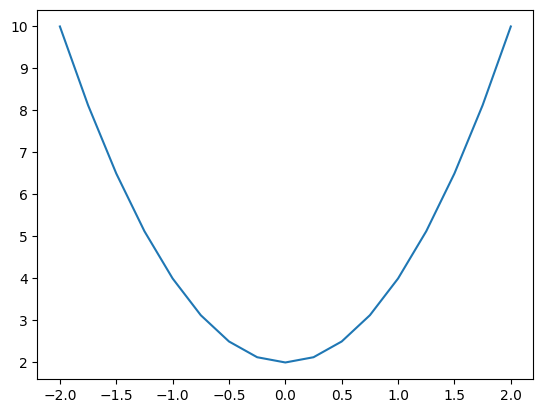

In [28]:
plt.plot(x.data,y.data)
plt.show()

In [29]:
# 경사 계싼을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수로 붙임

z=y.sum()


In [31]:
# 계산 그래프 시각화
# 필요한 라이브러리 임포트
# 라이브러리를 따로 설정 해야됨
#https://blog.naver.com/ssdyka/221242275911
#from torchviz import make_dot

# 시각화 함수 호출
#g = make_dot(z, params={'x':x})
#display(g)

In [32]:
# 경사 계산

z.backward()

In [33]:
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])
